In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-35.81822406563982 126.7152904700153
68.43327612005882 155.21535065580787
-48.00858989480213 -51.16481727226844
-85.08556002899718 137.98796794003624
-89.8346006827622 115.26521820218932
39.801449961206 -178.9559617417392
-47.82447061679489 73.24720689314282
-56.76215444323392 -96.25558653167867
-44.933425101494386 131.70216989488353
13.397117783866932 152.47564202821826
-65.40877417574137 -20.231330618705016
-81.50871760033645 -173.92750530032197
-71.30952589067851 165.1609333407945
-71.50390467169504 51.26107075240617
-36.9493861635414 57.02919152138742
-80.22426782931964 171.831459320636
-32.2785225876718 163.76828836705124
-48.97315509741732 -102.43046549760908
-1.6868406951219725 -140.57756873711475
52.02157864910953 93.33135363689661
30.466080990313728 23.439153524304743
16.866542453160534 -94.73692596695736
-71.82462085853831 112.65463466565978
64.28166866183463 -60.289474884014595
5.847534278107531 96.87929272396616
-68.51022647925915 -71.19325395928749
-85.12082139754514 166.1

In [5]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | srednekolymsk
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | ahipara
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | turan
Processing Record 20 of Set 1 | tubruq
City not found. Skipping...
Processing Record 21 of Set 1 | matias romero
Processing Record 22 of Se

Processing Record 35 of Set 4 | cabedelo
Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | sao filipe
Processing Record 38 of Set 4 | seguela
Processing Record 39 of Set 4 | churapcha
Processing Record 40 of Set 4 | kaeo
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | saint-pierre
Processing Record 43 of Set 4 | saint paul
Processing Record 44 of Set 4 | colon
Processing Record 45 of Set 4 | gbadolite
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | punta alta
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | lavrentiya
Processing Record 3 of Set 5 | rawicz
Processing Record 4 of Set 5 | adrar
Processing Record 5 of Set 5 | pangai
Processing Record 6 of Set 5 | honiara
Processing Record 7 of Set 5 | frutal
Processing Record 8 of Set 5 | itaituba
Processing Record 

Processing Record 26 of Set 8 | sandakan
Processing Record 27 of Set 8 | calbuco
Processing Record 28 of Set 8 | muravlenko
Processing Record 29 of Set 8 | labelle
Processing Record 30 of Set 8 | nuuk
Processing Record 31 of Set 8 | lahan
Processing Record 32 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 33 of Set 8 | mitchell
Processing Record 34 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 35 of Set 8 | mrirt
City not found. Skipping...
Processing Record 36 of Set 8 | port-cartier
Processing Record 37 of Set 8 | warrington
Processing Record 38 of Set 8 | beira
Processing Record 39 of Set 8 | san angelo
Processing Record 40 of Set 8 | marawi
Processing Record 41 of Set 8 | comodoro rivadavia
Processing Record 42 of Set 8 | abha
Processing Record 43 of Set 8 | finschhafen
Processing Record 44 of Set 8 | santa maria
Processing Record 45 of Set 8 | florence
Processing Record 46 of Set 8 | krivopolyanye
City not found. Skipping...
Processing Record 

Processing Record 16 of Set 12 | turiacu
Processing Record 17 of Set 12 | kundgol
Processing Record 18 of Set 12 | kalga
Processing Record 19 of Set 12 | prince rupert
Processing Record 20 of Set 12 | chake chake
Processing Record 21 of Set 12 | gua musang
Processing Record 22 of Set 12 | druzhba
Processing Record 23 of Set 12 | magtanggol
City not found. Skipping...
Processing Record 24 of Set 12 | severo-yeniseyskiy
Processing Record 25 of Set 12 | sampit
Processing Record 26 of Set 12 | krutinka
Processing Record 27 of Set 12 | ouidah
Processing Record 28 of Set 12 | umtata
Processing Record 29 of Set 12 | sovetskiy
Processing Record 30 of Set 12 | bratsk
Processing Record 31 of Set 12 | kerch
Processing Record 32 of Set 12 | bend
Processing Record 33 of Set 12 | iwanai
Processing Record 34 of Set 12 | cortes
Processing Record 35 of Set 12 | juneau
Processing Record 36 of Set 12 | rincon
Processing Record 37 of Set 12 | tilichiki
Processing Record 38 of Set 12 | great yarmouth
Proce

In [10]:
len(cities)

614

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,53.80,66,68,11.27,AU,2022-08-06 02:02:19
1,Srednekolymsk,67.4500,153.6833,63.00,47,100,2.84,RU,2022-08-06 02:02:19
2,Mar Del Plata,-38.0023,-57.5575,44.10,89,100,1.99,AR,2022-08-06 02:00:06
3,Hobart,-42.8794,147.3294,49.05,83,40,14.97,AU,2022-08-06 01:58:11
4,Albany,42.6001,-73.9662,78.67,82,98,2.93,US,2022-08-06 02:00:07
5,Provideniya,64.3833,-173.3000,51.44,56,40,10.98,RU,2022-08-06 02:02:20
6,Souillac,-20.5167,57.5167,67.32,70,1,10.22,MU,2022-08-06 02:02:20
7,Punta Arenas,-53.1500,-70.9167,37.27,77,35,5.12,CL,2022-08-06 02:01:49
8,Port Lincoln,-34.7333,135.8667,56.16,66,20,15.28,AU,2022-08-06 02:02:21
9,Kavieng,-2.5744,150.7967,83.80,68,98,3.09,PG,2022-08-06 02:02:21


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2022-08-06 02:02:19,-33.8667,121.9000,53.80,66,68,11.27
1,Srednekolymsk,RU,2022-08-06 02:02:19,67.4500,153.6833,63.00,47,100,2.84
2,Mar Del Plata,AR,2022-08-06 02:00:06,-38.0023,-57.5575,44.10,89,100,1.99
3,Hobart,AU,2022-08-06 01:58:11,-42.8794,147.3294,49.05,83,40,14.97
4,Albany,US,2022-08-06 02:00:07,42.6001,-73.9662,78.67,82,98,2.93
5,Provideniya,RU,2022-08-06 02:02:20,64.3833,-173.3000,51.44,56,40,10.98
6,Souillac,MU,2022-08-06 02:02:20,-20.5167,57.5167,67.32,70,1,10.22
7,Punta Arenas,CL,2022-08-06 02:01:49,-53.1500,-70.9167,37.27,77,35,5.12
8,Port Lincoln,AU,2022-08-06 02:02:21,-34.7333,135.8667,56.16,66,20,15.28
9,Kavieng,PG,2022-08-06 02:02:21,-2.5744,150.7967,83.80,68,98,3.09


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

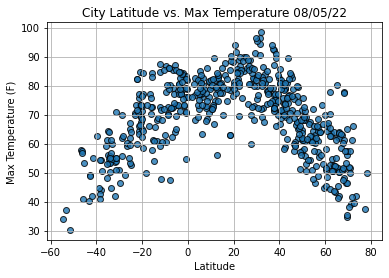

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

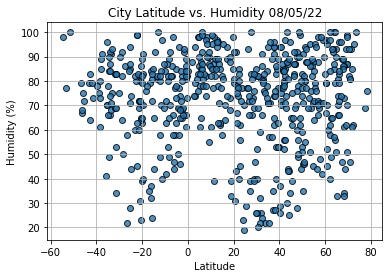

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

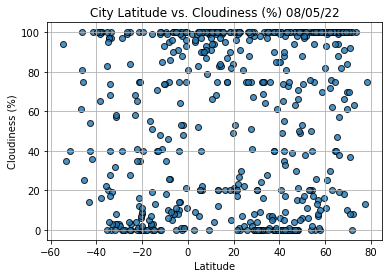

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

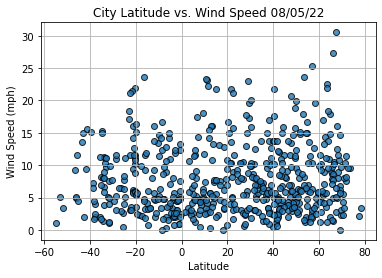

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

In [47]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Srednekolymsk,RU,2022-08-06 02:02:19,67.4500,153.6833,63.00,47,100,2.84
4,Albany,US,2022-08-06 02:00:07,42.6001,-73.9662,78.67,82,98,2.93
5,Provideniya,RU,2022-08-06 02:02:20,64.3833,-173.3000,51.44,56,40,10.98
17,Turan,VN,2022-08-06 02:02:24,16.0678,108.2208,87.78,70,20,2.30
18,Matias Romero,MX,2022-08-06 02:02:24,16.8833,-95.0333,74.79,89,87,7.49


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

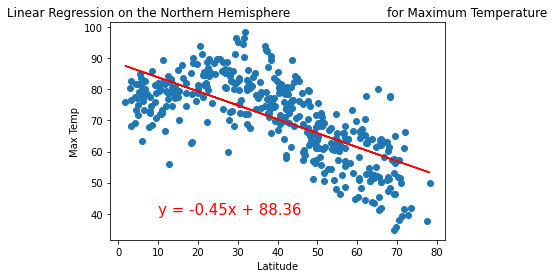

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

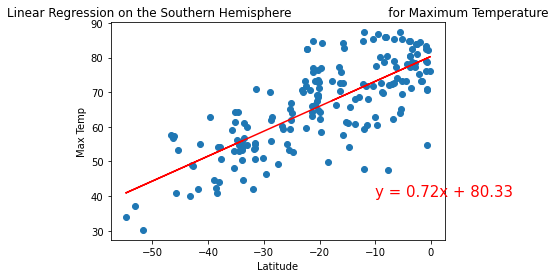

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-10,40))

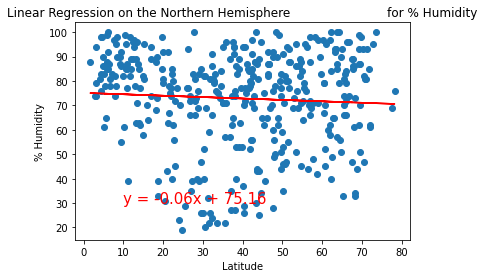

In [67]:
# Linear regression on the Northern Hemisphere % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,30))

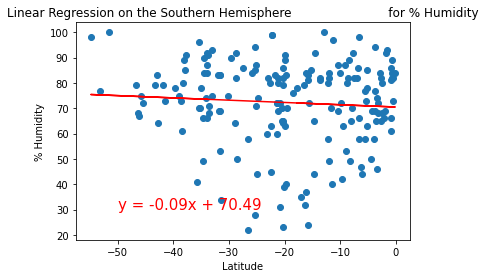

In [68]:
# Linear regression on the Southern Hemisphere % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

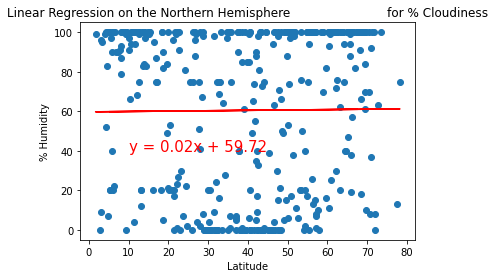

In [65]:
# Linear regression on the Northern Hemisphere % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(10,40))

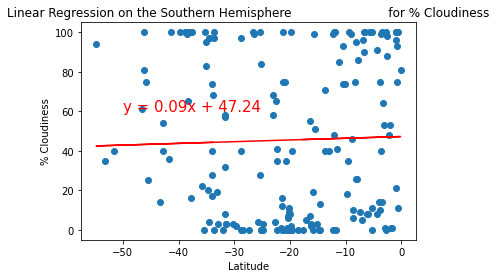

In [63]:
# Linear regression on the Southern Hemisphere % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

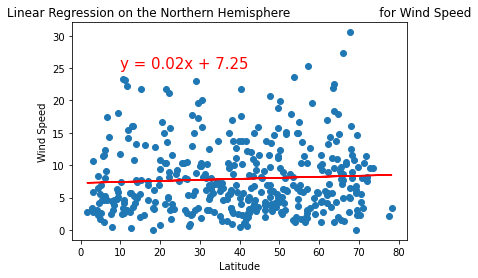

In [71]:
# linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed',(10,25))

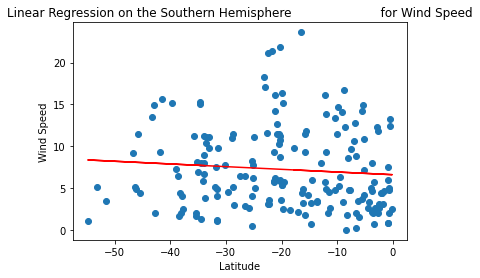

In [73]:
# linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed',(10,20))